In [1]:
import tensorflow as tf
from tensorflow import keras
print('hello')

hello


In [2]:
from tensorflow.keras.preprocessing import image

In [3]:
!python --version

Python 3.7.0


In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [6]:
X_train_full.shape,X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

Fashion MNIST
-  28×28 pixels each, with 10 classes
- 60,000 such images in training set and 10000 in test set.
- 

FEATURE SCALING:

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[1]]

'T-shirt/top'

#### Creating the Model Using the Sequential API

In [10]:
model = keras.models.Sequential()

- This is the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially. This is called the sequential API.
- sequential API is very convinient but not flexible.

In [11]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

- this is our first layer of the model.
- It is a Flatten layer whoserole is simply to convert each input image into a 1D array
- Alternatively, you could add a keras.layers.InputLayer as the first layer, setting shape=[28,28] and then flatten it.

In [12]:
model.add(keras.layers.Dense(300, activation= 'relu'))

-  we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function.
- Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).

In [13]:
model.add(keras.layers.Dense(100, activation="relu"))

In [14]:
model.add(keras.layers.Dense(10, activation="softmax"))

- Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).


#### SHORT WAY TO DO THIS

In [15]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


-  For example, the first hidden
layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to
235,500 parameters! 

#### extracting layers:

In [17]:
model.layers

In [18]:
a = model.layers[1]
type(a)

tensorflow.python.keras.layers.core.Dense

In [19]:
weights, biases = model.layers[1].get_weights() #weights for layer 2 (dense)

In [20]:
weights.shape

(784, 300)

In [21]:
biases.shape

(300,)

- weights are randomly initialized
- biases are all zeros initially.

#### COMPILING 

In [22]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

### Training and Evaluating the Model

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 126us/sample - loss: 0.6985 - accuracy: 0.7699 - val_loss: 0.5025 - val_accuracy: 0.8338
Epoch 2/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4822 - accuracy: 0.8306 - val_loss: 0.4370 - val_accuracy: 0.8514
Epoch 3/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.4375 - accuracy: 0.8468 - val_loss: 0.4249 - val_accuracy: 0.8520
Epoch 4/30
55000/55000 [==============================] - 5s 100us/sample - loss: 0.4106 - accuracy: 0.8565 - val_loss: 0.3889 - val_accuracy: 0.8696
Epoch 5/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.3905 - accuracy: 0.8636 - val_loss: 0.3879 - val_accuracy: 0.8684
Epoch 6/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.3737 - accuracy: 0.8683 - val_loss: 0.3732 - val_accuracy: 0.8706
Epoch 7/30
55000/55000 [==============================

- The fit() method returns a History object containing the training parameters (history.params)
- the list of epochs it went through (history.epoch)
- most impor‐tantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set. 

#### history.history

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
h = pd.DataFrame(history.history)

(0.0, 1.0)

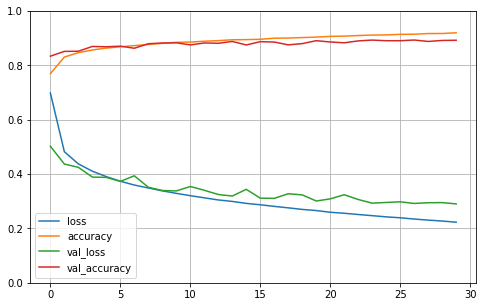

In [29]:
h.plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

- You can tell that the model has not quite converged
yet, as the validation loss is still going down, so you should probably continue train‐
ing. It’s as simple as calling the fit() method again, since Keras just continues train‐
ing where it left off (you should be able to reach close to 89% validation accuracy).


- If you are not satisfied with the performance of your model, you should go back and tune the model’s hyperparameters:
    - number of layers,
    -  the number of neurons per layer,
    - the types of activation functions we use for each hidden layer
    -  the number of training epochs
    - the batch size (it can be set in the fit() method using the
batch_size argument, which defaults to 32).

#### EVALUATION

In [30]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[66.58527526998513, 0.8407]

### Using the Model to Make Predictions


In [31]:
X_new = X_test[:3]/255.0

In [32]:
y_prob = model.predict(X_new)

In [33]:
y_prob.shape

(3, 10)

In [34]:
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred = model.predict_classes(X_new)

In [36]:
y_pred

array([9, 2, 1], dtype=int64)

In [37]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')